In [1]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
def plot(y_val, y_pred, title):
    labels = unique_labels(y_train)
    column = [f'Predi {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val, y_pred),
                         columns=column,index=indices)
    
    heatmap = sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
    heatmap.set_title(title)
    return heatmap

In [3]:
def resultadosModelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, zero_division=1)
    print("Precisión:", accuracy)
    print("Informe de Clasificación:\n")
    print(classification_rep)

In [4]:
datos = pd.read_csv("winequalityN.csv") 

In [5]:
red_data = datos[datos['type'] == 'red']
white_data = datos[datos['type'] == 'white']

In [20]:
x_red = red_data.drop(['quality'], axis=1)
y_red = red_data['quality']
x_white = white_data.drop(['quality'], axis=1)
y_white = white_data['quality']

In [21]:
random_over = RandomOverSampler()

In [22]:
x_over, y_over = random_over.fit_resample(x_red, y_red)
x_over_w, y_over_w = random_over.fit_resample(x_white, y_white)

In [24]:
np.unique(y_over, return_counts=True)

(array([3, 4, 5, 6, 7, 8], dtype=int64),
 array([681, 681, 681, 681, 681, 681], dtype=int64))

In [25]:
datos_over = pd.concat([x_over, y_over], axis=1)
datos_over_w = pd.concat([x_over_w, y_over_w], axis=1)

In [26]:
datos_over

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,red,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
4082,red,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
4083,red,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
4084,red,7.2,0.38,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8


In [27]:
datos_over_w

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15381,white,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
15382,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
15383,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
15384,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


In [28]:
datos_over['quality'].value_counts()
datos_over_w['quality'].value_counts()

quality
6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: count, dtype: int64

<Axes: title={'center': 'OverS'}, xlabel='quality'>

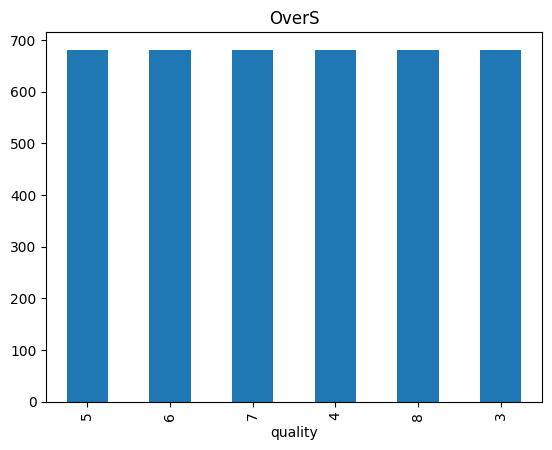

In [29]:
datos_over['quality'].value_counts().plot(kind='bar', title='OverS')

<Axes: title={'center': 'OverS'}, xlabel='quality'>

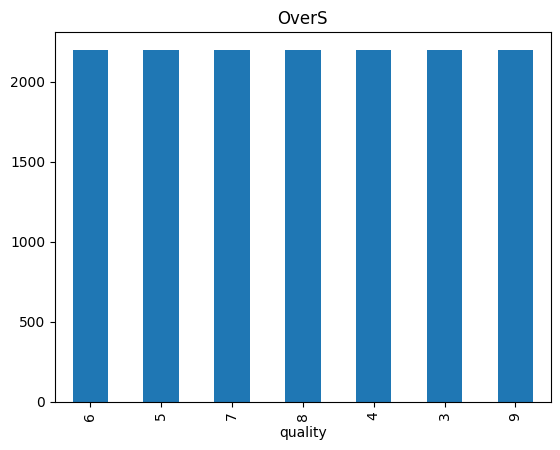

In [30]:
datos_over_w['quality'].value_counts().plot(kind='bar', title='OverS')

In [31]:
datos_over=datos_over.drop(['type'], axis=1)
datos_over_w=datos_over_w.drop(['type'], axis=1)

In [32]:
datos_over

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
4082,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
4083,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
4084,7.2,0.38,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8


In [33]:
datos_over_w

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
15381,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
15382,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
15383,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
15384,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


In [34]:
X = datos_over.drop('quality', axis=1)
Y = datos_over['quality']
X_w = datos_over_w.drop('quality', axis=1)
Y_w = datos_over_w['quality']

In [35]:
mean = X.mean(axis=0)
std = X.std(axis=0)
data_normalized = (X - mean) / std

mean_w = X_w.mean(axis=0)
std_w = X_w.std(axis=0)
data_normalized_w = (X_w - mean_w) / std_w

In [36]:
data_normalized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.518197,0.465430,-1.253690,-0.498260,-0.246026,-0.291040,-0.133346,0.635368,1.079650,-0.580595,-1.072263
1,-0.297426,1.155167,-1.253690,0.000375,0.175210,1.058559,0.978735,0.145422,-0.764744,0.094339,-0.751448
2,-0.297426,0.695342,-1.069458,-0.213326,0.060328,0.094560,0.540643,0.243411,-0.407764,-0.074395,-0.751448
3,1.579134,-1.143957,1.325557,-0.498260,-0.265173,0.287359,0.742839,0.733358,-1.002730,-0.468106,-0.751448
4,-0.518197,0.465430,-1.253690,-0.498260,-0.246026,-0.291040,-0.133346,0.635368,1.079650,-0.580595,-1.072263
...,...,...,...,...,...,...,...,...,...,...,...
4081,-0.628583,-0.952364,0.266223,-0.640727,-0.533232,-1.062239,-0.841034,-0.246536,-0.586254,2.456606,-0.591040
4082,0.916819,-1.220595,1.233441,-0.498260,-0.111996,2.697357,1.214631,-0.976556,-2.073669,-0.186883,0.852628
4083,-0.242233,-0.875726,0.864977,0.712710,-0.207731,0.094560,-0.032248,0.390395,0.127705,1.106739,1.654666
4084,-0.628583,-0.760770,0.174107,-0.427026,-0.628968,0.094560,-0.301843,-0.873667,-0.586254,0.544295,0.451609


In [37]:
data_normalized_w

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.055931,-0.270490,0.197578,3.190884,0.048701,0.316310,0.616683,2.451104,-1.316786,-0.265529,-1.521911
1,-0.699961,-0.020666,0.021194,-0.865381,0.202008,-0.736544,-0.067672,0.155381,0.560875,0.077135,-1.005170
2,0.956116,-0.187215,0.550347,0.260179,0.240335,-0.193135,-0.697999,0.516138,0.310521,-0.351195,-0.562249
3,0.128078,-0.603589,-0.155191,0.599971,0.546949,0.384236,0.904832,0.680118,-0.127601,-0.693859,-0.709889
4,0.128078,-0.603589,-0.155191,0.599971,0.546949,0.384236,0.904832,0.680118,-0.127601,-0.693859,-0.709889
...,...,...,...,...,...,...,...,...,...,...,...
15381,0.312086,-0.520314,0.197578,-0.780433,-0.487875,-0.295024,0.058393,-0.976082,0.435698,-0.008531,1.209434
15382,1.876159,-0.270490,0.991308,1.045948,-0.334568,-0.261061,-0.211747,1.139262,-0.065012,-0.179863,-0.340789
15383,-0.147935,0.478983,0.021194,-0.313219,-0.986123,0.723867,-0.301793,-1.222052,0.435698,-1.036523,1.357074
15384,0.036073,-0.353764,1.344077,-0.737959,-0.449548,-0.159172,-0.409849,-1.058072,0.998996,-0.522527,1.504715


## Correlación bases con oversampling

<Axes: >

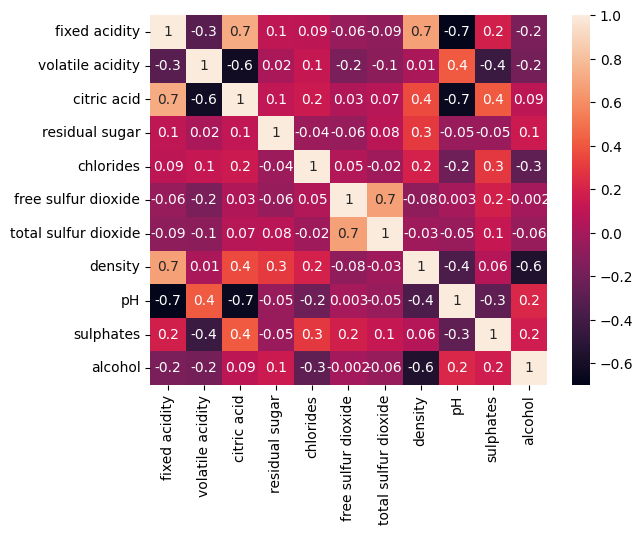

In [38]:
sns.heatmap(data_normalized.corr(),annot=True,fmt=".0g")

<Axes: >

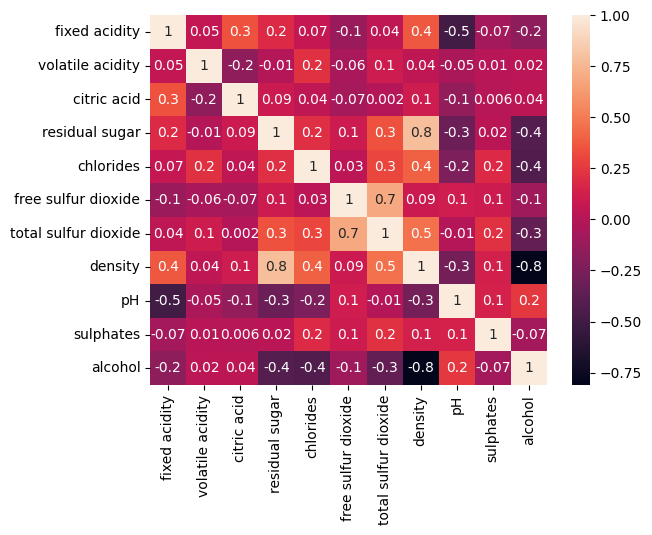

In [39]:
sns.heatmap(data_normalized_w.corr(),annot=True,fmt=".0g")

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_normalized ,Y, test_size=0.3, random_state=42)

In [32]:
# Eliminar filas con valores NaN
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Asegúrate de actualizar y_train también

X_val = X_val.dropna()
y_val = y_val[X_val.index]  # Asegúrate de actualizar y_val también

# Luego, puedes usar X_train y X_val en tu modelo KNeighborsClassifier


In [40]:
# Verificar la forma de los conjuntos de datos después de eliminar filas con valores faltantes
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)

print("\nForma de X_val:", X_val.shape)
print("Forma de y_val:", y_val.shape)


Forma de X_train: (2842, 11)
Forma de y_train: (2842,)

Forma de X_val: (1221, 11)
Forma de y_val: (1221,)


## K-means

In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1,leaf_size=80)
neigh.fit(X_train, y_train)
y_pred2 = neigh.predict(X_val)

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size':[10,20,40,60,80,100,120]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba2 = best_model.predict(X_val)
y_test_prueba2 = best_model.predict(X_train)
best_params = grid_search.best_params_
best_params

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

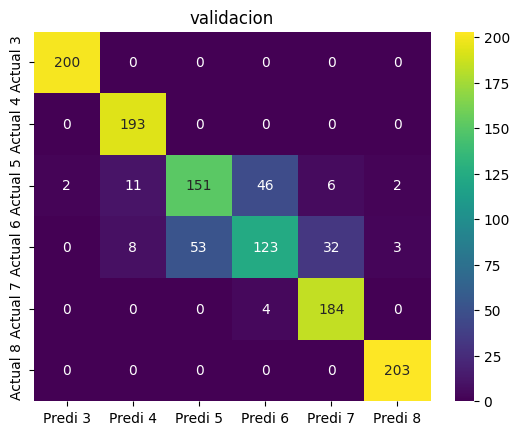

In [35]:
plot(y_val,y_pred_prueba2,"validacion")
plt.savefig("validacionKm.eps",format='eps')

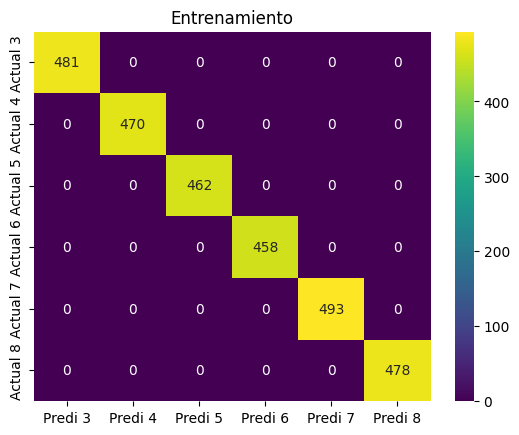

In [36]:
plot(y_train,y_test_prueba2,"Entrenamiento")
plt.savefig("EntrenamientoKm.eps",format='eps')

In [37]:
resultadosModelo(y_val, y_pred_prueba2)

Precisión: 0.8632268632268633
Informe de Clasificación:

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       200
           4       0.91      1.00      0.95       193
           5       0.74      0.69      0.72       218
           6       0.71      0.56      0.63       219
           7       0.83      0.98      0.90       188
           8       0.98      1.00      0.99       203

    accuracy                           0.86      1221
   macro avg       0.86      0.87      0.86      1221
weighted avg       0.86      0.86      0.86      1221



In [38]:
resultadosModelo(y_train, y_test_prueba2)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       481
           4       1.00      1.00      1.00       470
           5       1.00      1.00      1.00       462
           6       1.00      1.00      1.00       458
           7       1.00      1.00      1.00       493
           8       1.00      1.00      1.00       478

    accuracy                           1.00      2842
   macro avg       1.00      1.00      1.00      2842
weighted avg       1.00      1.00      1.00      2842

